<a href="https://colab.research.google.com/github/ghufronmalik64/UAS-Kecerdasan-Buatan/blob/main/Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Di Google Colab, jalankan kode ini untuk upload file
from google.colab import files
uploaded = files.upload()  # Klik "Choose Files" dan pilih heart.csv

Saving heart.csv to heart (2).csv


In [ ]:
# WAJIB JALANKAN INI DULU!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

# Sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)

import warnings
warnings.filterwarnings('ignore')

print("✅ Library berhasil di-import!")

✅ Library berhasil di-import!


In [ ]:
# Load dataset
df = pd.read_csv('heart.csv')

In [ ]:
print("=" * 80)
print("TAHAP 3: EKSPLORASI DATA")
print("=" * 80)

print("\n📊 INFORMASI DATASET AWAL")
print("-" * 80)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"\nKolom dataset:\n{df.columns.tolist()}")

print("\n📋 5 BARIS PERTAMA DATA:")
print(df.head())

print("\n📈 INFORMASI TIPE DATA:")
print(df.info())

print("\n📊 STATISTIK DESKRIPTIF:")
print(df.describe())

TAHAP 3: EKSPLORASI DATA

📊 INFORMASI DATASET AWAL
--------------------------------------------------------------------------------
Jumlah baris: 1025
Jumlah kolom: 14

Kolom dataset:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

📋 5 BARIS PERTAMA DATA:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

📈 INFORMASI TIPE DATA:
<class 'pandas.core.frame

In [ ]:
print("\n" + "=" * 80)
print("TAHAP 4: DATA CLEANING")
print("=" * 80)

# Cek missing values
print("\n🔍 CEK MISSING VALUES:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "✓ Tidak ada missing values")

# Cek data duplikat
duplicates = df.duplicated().sum()
print(f"\n🔍 CEK DATA DUPLIKAT: {duplicates} baris duplikat")

# Hapus duplikat
df_clean = df.drop_duplicates()
print(f"✓ Data setelah menghapus duplikat: {df_clean.shape[0]} baris")

# Simpan informasi cleaning
data_awal = df.shape[0]
data_bersih = df_clean.shape[0]
data_dihapus = data_awal - data_bersih

print(f"\n📊 RINGKASAN CLEANING:")
print(f"  - Data awal: {data_awal}")
print(f"  - Data setelah cleaning: {data_bersih}")
print(f"  - Data yang dihapus: {data_dihapus}")

# Update dataframe
df = df_clean.copy()


TAHAP 4: DATA CLEANING

🔍 CEK MISSING VALUES:
✓ Tidak ada missing values

🔍 CEK DATA DUPLIKAT: 723 baris duplikat
✓ Data setelah menghapus duplikat: 302 baris

📊 RINGKASAN CLEANING:
  - Data awal: 1025
  - Data setelah cleaning: 302
  - Data yang dihapus: 723



TAHAP 5: TRANSFORMASI TARGET VARIABLE

📊 DISTRIBUSI KELAS:
target
1    164
0    138
Name: count, dtype: int64

Persentase:
target
1    54.304636
0    45.695364
Name: proportion, dtype: float64


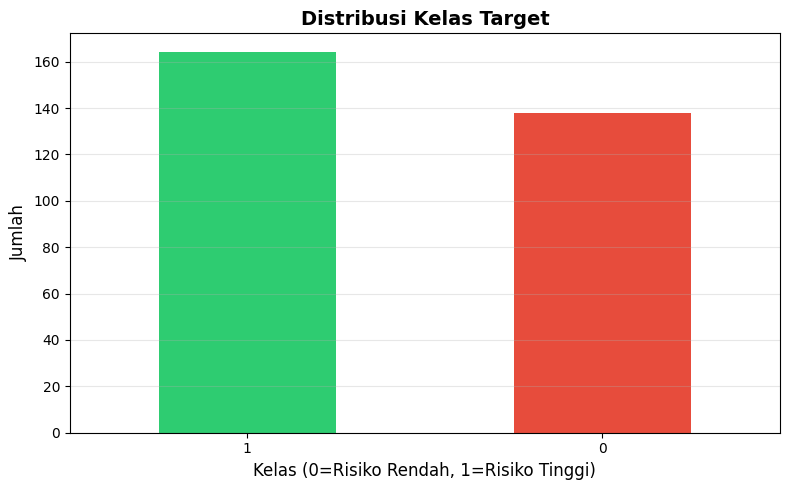

In [ ]:
print("\n" + "=" * 80)
print("TAHAP 5: TRANSFORMASI TARGET VARIABLE")
print("=" * 80)

# Ubah target menjadi binary: 0 = risiko rendah, 1-4 = risiko tinggi
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

print("\n📊 DISTRIBUSI KELAS:")
print(df['target'].value_counts())
print(f"\nPersentase:")
print(df['target'].value_counts(normalize=True) * 100)

# Visualisasi
plt.figure(figsize=(8, 5))
df['target'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribusi Kelas Target', fontsize=14, fontweight='bold')
plt.xlabel('Kelas (0=Risiko Rendah, 1=Risiko Tinggi)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "=" * 80)
print("TAHAP 7: FEATURE SELECTION - UJI HIPOTESIS")
print("=" * 80)

# Definisi fitur
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal', 'sex', 'fbs', 'exang']

# Uji T-Test untuk fitur numerik
print("\n📊 UJI T-TEST UNTUK FITUR NUMERIK")
print("-" * 80)
print(f"{'Fitur':<15} {'t-statistic':<15} {'p-value':<15} {'Keputusan'}")
print("-" * 80)

numeric_test_results = {}
for feature in numeric_features:
    group_0 = df[df['target'] == 0][feature]
    group_1 = df[df['target'] == 1][feature]

    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    decision = "H0 Ditolak" if p_value < 0.05 else "H0 Gagal Ditolak"

    numeric_test_results[feature] = {
        't_statistic': t_stat,
        'p_value': p_value,
        'decision': decision,
        'significant': p_value < 0.05
    }

    print(f"{feature:<15} {t_stat:<15.4f} {p_value:<15.6f} {decision}")

# Uji Chi-Square untuk fitur kategorik
print("\n📊 UJI CHI-SQUARE UNTUK FITUR KATEGORIK")
print("-" * 80)
print(f"{'Fitur':<15} {'chi2-statistic':<15} {'p-value':<15} {'Keputusan'}")
print("-" * 80)

categorical_test_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['target'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    decision = "H0 Ditolak" if p_value < 0.05 else "H0 Gagal Ditolak"

    categorical_test_results[feature] = {
        'chi2_statistic': chi2,
        'p_value': p_value,
        'decision': decision,
        'significant': p_value < 0.05
    }

    print(f"{feature:<15} {chi2:<15.4f} {p_value:<15.6f} {decision}")

# Seleksi fitur signifikan
selected_numeric = [f for f in numeric_features if numeric_test_results[f]['significant']]
selected_categorical = [f for f in categorical_features if categorical_test_results[f]['significant']]

print(f"\n✓ Fitur Numerik Terpilih: {selected_numeric}")
print(f"✓ Fitur Kategorik Terpilih: {selected_categorical}")

selected_features = selected_numeric + selected_categorical
print(f"\n📊 TOTAL FITUR TERPILIH: {len(selected_features)}")


TAHAP 7: FEATURE SELECTION - UJI HIPOTESIS

📊 UJI T-TEST UNTUK FITUR NUMERIK
--------------------------------------------------------------------------------
Fitur           t-statistic     p-value         Keputusan
--------------------------------------------------------------------------------
age             3.9338          0.000104        H0 Ditolak
trestbps        2.5610          0.010927        H0 Ditolak
chol            1.4152          0.158037        H0 Gagal Ditolak
thalach         -8.0148         0.000000        H0 Ditolak
oldpeak         8.2293          0.000000        H0 Ditolak

📊 UJI CHI-SQUARE UNTUK FITUR KATEGORIK
--------------------------------------------------------------------------------
Fitur           chi2-statistic  p-value         Keputusan
--------------------------------------------------------------------------------
cp              80.9788         0.000000        H0 Ditolak
restecg         9.7297          0.007713        H0 Ditolak
slope           46.8895

In [ ]:
print("\n" + "=" * 80)
print("TAHAP 8: PREPROCESSING & SPLIT DATA")
print("=" * 80)

# Pisahkan X dan y
X = df[selected_features]
y = df['target']

# Preprocessing
selected_numeric_final = [f for f in selected_numeric if f in selected_features]
selected_categorical_final = [f for f in selected_categorical if f in selected_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_numeric_final),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), selected_categorical_final)
    ])

X_processed = preprocessor.fit_transform(X)

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"✓ Data Training: {X_train.shape[0]} samples")
print(f"  - Kelas 0: {(y_train == 0).sum()}")
print(f"  - Kelas 1: {(y_train == 1).sum()}")

print(f"\n✓ Data Testing: {X_test.shape[0]} samples")
print(f"  - Kelas 0: {(y_test == 0).sum()}")
print(f"  - Kelas 1: {(y_test == 1).sum()}")


TAHAP 8: PREPROCESSING & SPLIT DATA
✓ Data Training: 241 samples
  - Kelas 0: 110
  - Kelas 1: 131

✓ Data Testing: 61 samples
  - Kelas 0: 28
  - Kelas 1: 33



TAHAP 10: TRAINING MODEL (10-FOLD CROSS VALIDATION)

📊 HASIL CROSS VALIDATION:
--------------------------------------------------------------------------------
Model                     Mean Accuracy   Std Dev        
--------------------------------------------------------------------------------
Gradient Boosting         0.8087          0.0800         
Random Forest             0.8087          0.0656         
Naive Bayes               0.8333          0.1250         
Logistic Regression       0.8458          0.0769         


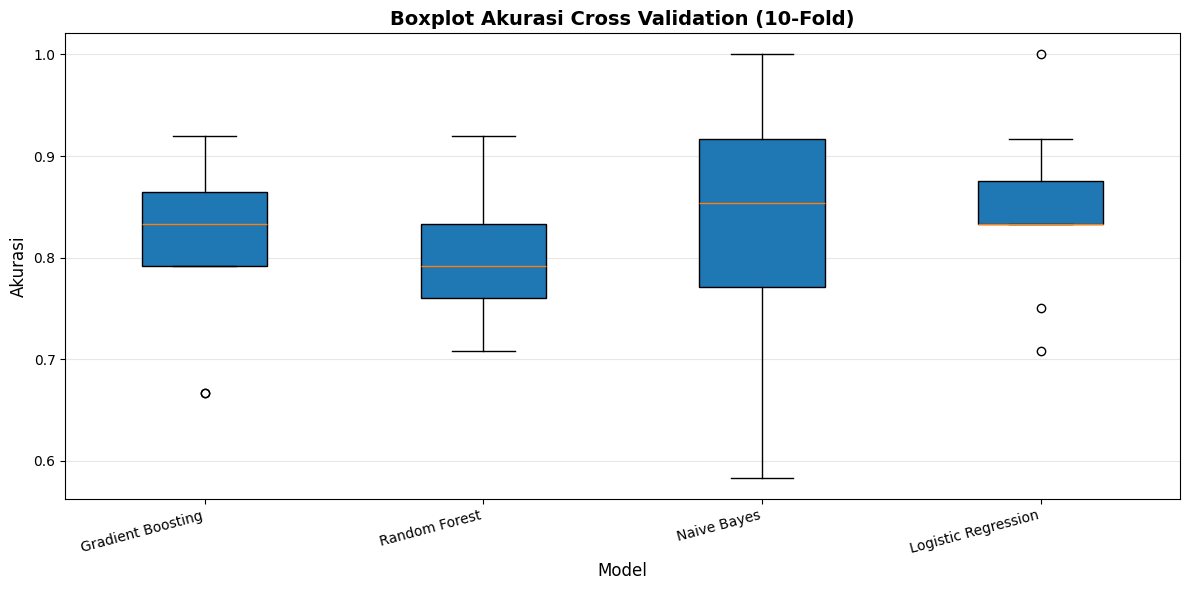

In [ ]:
print("\n" + "=" * 80)
print("TAHAP 10: TRAINING MODEL (10-FOLD CROSS VALIDATION)")
print("=" * 80)

# Definisi model
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Cross validation
cv_results = {}
cv_scores_all = {}

print("\n📊 HASIL CROSS VALIDATION:")
print("-" * 80)
print(f"{'Model':<25} {'Mean Accuracy':<15} {'Std Dev':<15}")
print("-" * 80)

for model_name, model in models.items():
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

    cv_results[model_name] = {
        'mean': cv_scores.mean(),
        'std': cv_scores.std(),
        'scores': cv_scores
    }
    cv_scores_all[model_name] = cv_scores

    print(f"{model_name:<25} {cv_scores.mean():<15.4f} {cv_scores.std():<15.4f}")

    # Train model
    model.fit(X_train, y_train)

# Boxplot
plt.figure(figsize=(12, 6))
plt.boxplot([cv_scores_all[model] for model in models.keys()],
            labels=models.keys(),
            patch_artist=True)
plt.title('Boxplot Akurasi Cross Validation (10-Fold)', fontsize=14, fontweight='bold')
plt.ylabel('Akurasi', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "=" * 80)
print("TAHAP 11: TESTING & EVALUASI MODEL")
print("=" * 80)

test_results = {}
y_preds = {}
confusion_matrices = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_preds[model_name] = y_pred

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

    test_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }

# Tampilkan hasil
print("\n📊 HASIL EVALUASI:")
print("-" * 80)
print(f"{'Model':<25} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-" * 80)

for model_name in models.keys():
    res = test_results[model_name]
    print(f"{model_name:<25} {res['accuracy']:<12.4f} {res['precision']:<12.4f} "
          f"{res['recall']:<12.4f} {res['f1_score']:<12.4f}")


TAHAP 11: TESTING & EVALUASI MODEL

📊 HASIL EVALUASI:
--------------------------------------------------------------------------------
Model                     Accuracy     Precision    Recall       F1-Score    
--------------------------------------------------------------------------------
Gradient Boosting         0.7705       0.7704       0.7705       0.7696      
Random Forest             0.7869       0.7878       0.7869       0.7871      
Naive Bayes               0.8525       0.8524       0.8525       0.8522      
Logistic Regression       0.8361       0.8361       0.8361       0.8361      


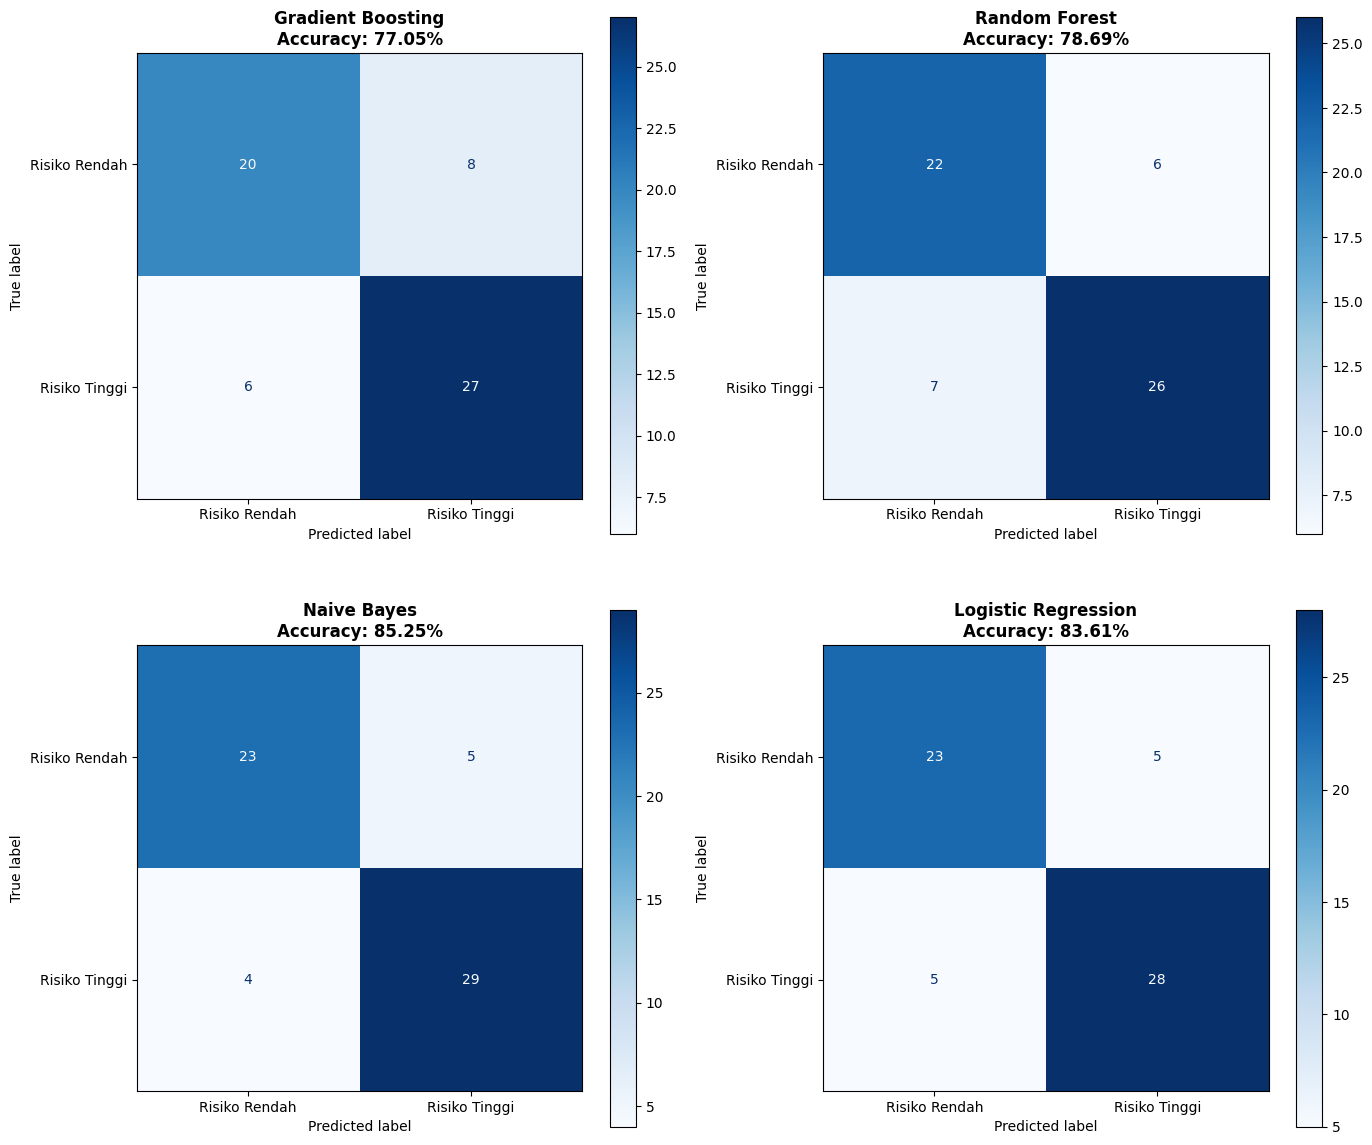

In [ ]:
# Visualisasi Confusion Matrix
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, (model_name, cm) in enumerate(confusion_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=['Risiko Rendah', 'Risiko Tinggi'])
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d')
    axes[idx].set_title(f'{model_name}\nAccuracy: {test_results[model_name]["accuracy"]:.2%}',
                       fontsize=12, fontweight='bold')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()


PERBANDINGAN HASIL DENGAN JURNAL

📊 TABEL PERBANDINGAN:
--------------------------------------------------------------------------------
Model                     Jurnal       Implementasi    Selisih     
--------------------------------------------------------------------------------
Gradient Boosting         0.8600       0.7705          -0.0895
Random Forest             0.8800       0.7869          -0.0931
Naive Bayes               0.9000       0.8525          -0.0475
Logistic Regression       0.8800       0.8361          -0.0439


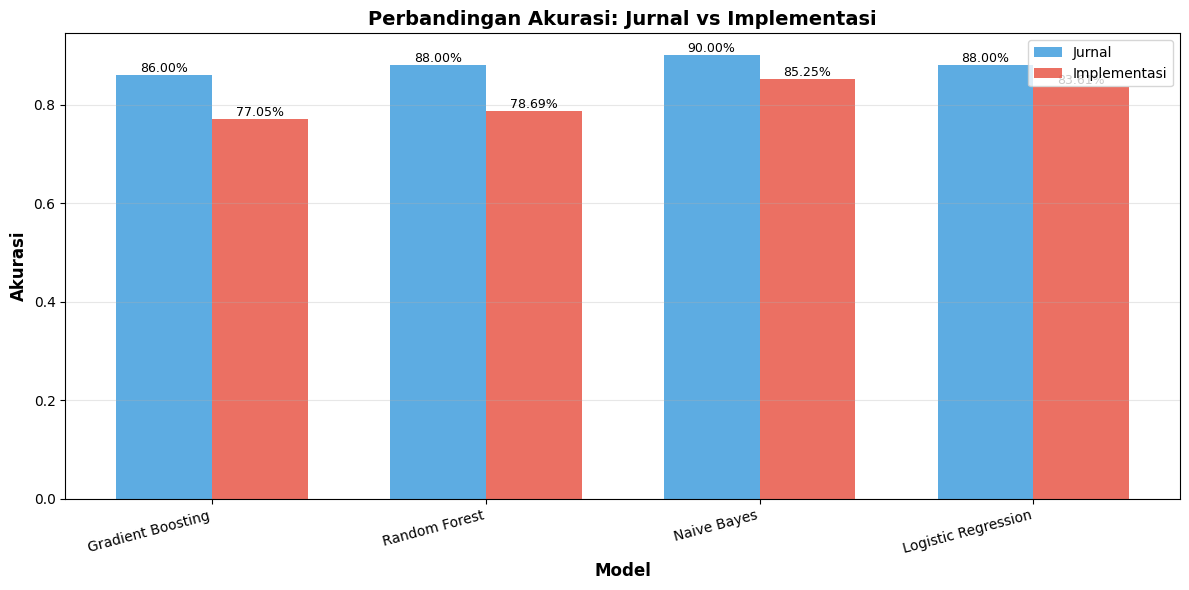


✅ IMPLEMENTASI SELESAI!


In [ ]:
print("\n" + "=" * 80)
print("PERBANDINGAN HASIL DENGAN JURNAL")
print("=" * 80)

jurnal_results = {
    'Gradient Boosting': 0.86,
    'Random Forest': 0.88,
    'Naive Bayes': 0.90,
    'Logistic Regression': 0.88
}

print("\n📊 TABEL PERBANDINGAN:")
print("-" * 80)
print(f"{'Model':<25} {'Jurnal':<12} {'Implementasi':<15} {'Selisih':<12}")
print("-" * 80)

for model_name in models.keys():
    jurnal_acc = jurnal_results[model_name]
    impl_acc = test_results[model_name]['accuracy']
    diff = impl_acc - jurnal_acc

    print(f"{model_name:<25} {jurnal_acc:<12.4f} {impl_acc:<15.4f} {diff:+.4f}")

# Grafik perbandingan
x_labels = list(models.keys())
jurnal_acc = [jurnal_results[m] for m in x_labels]
impl_acc = [test_results[m]['accuracy'] for m in x_labels]

x = np.arange(len(x_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, jurnal_acc, width, label='Jurnal', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, impl_acc, width, label='Implementasi', color='#e74c3c', alpha=0.8)

ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Akurasi', fontsize=12, fontweight='bold')
ax.set_title('Perbandingan Akurasi: Jurnal vs Implementasi', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2%}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✅ IMPLEMENTASI SELESAI!")
print("="*80)